# SVM test

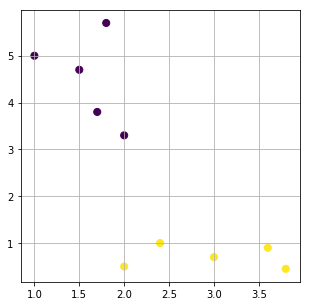

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X=np.zeros((10,2))
X[0]=[1,5]
X[1]=[1.5,4.7]
X[2]=[1.7,3.8]
X[3]=[1.8,5.7]
X[4]=[2,3.3]
X[5]=[2,0.5]
X[6]=[2.4,1]
X[7]=[3,0.7]
X[8]=[3.6,0.9]
X[9]=[3.8,0.45]
y=np.array([0,0,0,0,0,1,1,1,1,1])

plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], c=y , marker='o', s=50)
plt.grid()
plt.show()

In [2]:
from sklearn.svm import SVC
svm =SVC(kernel='linear')
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

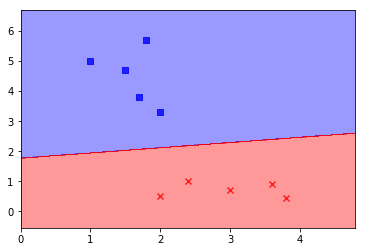

In [3]:
def plot_regions(X, y, classifier, resolution=0.01):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


plot_regions(X,y,classifier=svm)
plt.show()

In [4]:
print(svm.predict([[1, 5]]))

[0]


# 許容

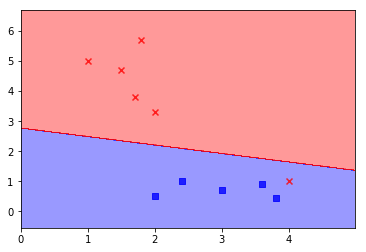

In [6]:
X=np.zeros((11,2))
X[0]=[1,5]
X[1]=[1.5,4.7]
X[2]=[1.7,3.8]
X[3]=[1.8,5.7]
X[4]=[2,3.3]
X[5]=[2,0.5]
X[6]=[2.4,1]
X[7]=[3,0.7]
X[8]=[3.6,0.9]
X[9]=[3.8,0.45]
X[10]=[4,1]
y=np.array([1,1,1,1,1,0,0,0,0,0,1])
svm =SVC(kernel='linear', C=1.0)
svm.fit(X,y)
plot_regions(X,y,classifier=svm)
plt.show()

# 明らかに分けられないケース

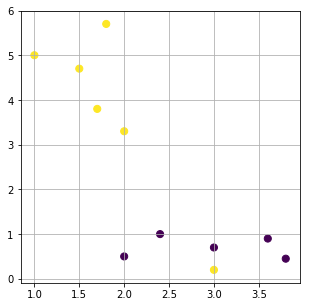

In [8]:
X=np.zeros((11,2))
X[0]=[1,5]
X[1]=[1.5,4.7]
X[2]=[1.7,3.8]
X[3]=[1.8,5.7]
X[4]=[2,3.3]
X[5]=[2,0.5]
X[6]=[2.4,1]
X[7]=[3,0.7]
X[8]=[3.6,0.9]
X[9]=[3.8,0.45]
X[10]=[3,0.2]
y=np.array([1,1,1,1,1,0,0,0,0,0,1])
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], c=y , marker='o', s=50)
plt.grid()
plt.show()

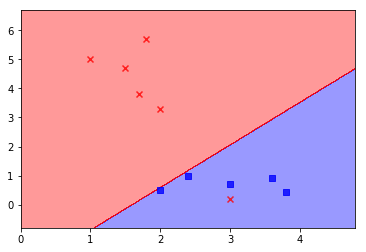

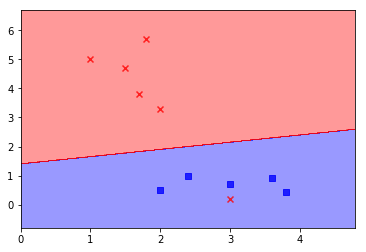

In [9]:
svm =SVC(kernel='linear', C=10**10)
svm.fit(X,y)
plot_regions(X,y,classifier=svm)
plt.show()

svm =SVC(kernel='linear', C=1.0)
svm.fit(X,y)
plot_regions(X,y,classifier=svm)
plt.show()